# 1.Preprocess module

In this notebook, we will convert the matrix representing the tumor area into a visualized PNG image format. Then cut the history image into patches, and finally use a pre trained model to extract features

## Import

In [1]:
!which python

/home/bejsernia/miniconda3/envs/HiST/bin/python


In [2]:
import os
import sys
import glob
#change this dir to path of R in your conda env
os.environ['R_HOME'] = '/home/bejsernia/miniconda3/envs/HiST_re/lib/R'
sys.path.append('../src/')
from util.patch import *
from util.seed import seed_torch
from util.mask2png import MaskRds2png
from FeatureExtraction.feature import extract_features, load_features

During startup - Warning messages:
1: package ‘methods’ was built under R version 4.3.3 
2: package ‘datasets’ was built under R version 4.3.3 
3: package ‘utils’ was built under R version 4.3.3 
4: package ‘grDevices’ was built under R version 4.3.3 
5: package ‘graphics’ was built under R version 4.3.3 
6: package ‘stats’ was built under R version 4.3.3 


In [3]:
seed = 42
seed_torch(seed)
# torch.set_num_threads(50)
# torch.cuda.set_per_process_memory_fraction(0.3)
Image.MAX_IMAGE_PIXELS = 100000000000

# Prepare Mask

In [4]:
rds_paths = glob.glob('../output/mask_rds/*gz')
rds_paths

['../output/mask_rds/CRC1.rds.gz', '../output/mask_rds/CRC2.rds.gz']

In [5]:
for sample in rds_paths:
    MaskRds2png(sample, type_num=3, out_path = '../output/mask_png/')

# Tile

In [7]:
sample_list = ['CRC1','CRC2']
HE_dir = "../data/HE"
position_dir = "../output/tissue_positions_list"
scalefactor_dir = "../output/scale_factor"

##### If images are full resolution HE images of 10x Visium, run this:

make sure that the name of image file is the same as sample_id

In [8]:
for sample_id in sample_list:
    print(sample_id, "start")
    HE_path = os.path.join(HE_dir,sample_id+".jpg")
    position_path = os.path.join(position_dir,sample_id+".csv")
    scalefactor_path = os.path.join(scalefactor_dir,sample_id+".csv")
    tile_fullres(
        HE_path,
        out_path = "../output/tile",
        sample_id = sample_id,
        position_path = position_path,
        scalefactor_path = scalefactor_path)

CRC1 start


Tiling image: 100%|██████████ [ time left: 00:00 ]


CRC2 start


Tiling image: 100%|██████████ [ time left: 00:00 ]


##### If images are 10x tissue_hires_image, run this:

In [9]:
HE_dir = "../data/hires_HE"

In [10]:
for sample_id in sample_list:
    print(sample_id, "start")
    HE_path = os.path.join(HE_dir,sample_id+"_tissue_hires_image.png")
    position_path = os.path.join(position_dir,sample_id+".csv")
    scalefactor_path = os.path.join(scalefactor_dir,sample_id+".csv")
    tile_hires(
        HE_path,
        out_path = "../output/hires_tile",
        sample_id = sample_id,
        position_path = position_path,
        scalefactor_path = scalefactor_path)

CRC1 start


Tiling image: 100%|██████████ [ time left: 00:00 ]


CRC2 start


Tiling image: 100%|██████████ [ time left: 00:00 ]


### test if tile succeed

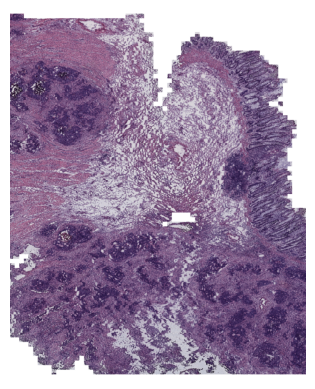

In [11]:
reconstruct('../output/tile/'+sample_list[0])

# Feature Extraction

In [12]:
all_sample_features = extract_features(
                            tile_path = '../output/tile',
                            img_ids = sample_list,
                            model_weight_path = '../resource/ctranspath.pth',
                            save = True,
                            seed = seed,
                            file = '../output/features/all_sample_features.pkl')

/home/bejsernia/miniconda3/envs/HiST/lib/python3.8/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789116784/work/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/mnt/d/Liwei/keti/空转/code/HiST_public/vignettes/../src/FeatureExtraction/feature.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longe

Extracting Feature Time Cost: 1.370867 min


### test if succeed

In [13]:
all_sample_features = load_features('../output/features/all_sample_features.pkl')